# Importar bibliotecas básicas

In [1]:
# !pip install scikit-learn
# !pip install sklearn.preprocessing
# !pip install cython
# !pip install --upgrade pip
# !pip install seaborn
# !pip install plotly
# !pip install --upgrade numpy

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

# Importar dados

In [5]:

paths = ['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv','Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
            'Friday-WorkingHours-Morning.pcap_ISCX.csv','Monday-WorkingHours.pcap_ISCX.csv',
            'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv','Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
            'Tuesday-WorkingHours.pcap_ISCX.csv','Wednesday-workingHours.pcap_ISCX.csv']
dfs = []
data_folder = '/home/andre/unicamp/ini_cien/data/raw_data'
for path in paths:
    dfs.append(pd.read_csv(os.path.join(data_folder,path), encoding='utf-8'))
df = pd.concat(dfs)

In [7]:
df[' Label'].value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

# Tratamento de dados

In [4]:
df = df.sample(2830743)
df.reset_index(drop=True, inplace=True)


In [5]:
#eliminate spaces in column names
df.columns = [col.strip() for col in df.columns]
df['Label'] = df['Label'].replace(to_replace=r'�', value='→', regex=True)

In [6]:
df['Label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2830743 entries, 0 to 2830742
Series name: Label
Non-Null Count    Dtype 
--------------    ----- 
2830743 non-null  object
dtypes: object(1)
memory usage: 21.6+ MB


In [7]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [9]:
# #rename classes
# df['Label'] = df['Label'].replace({'Web Attack → Brute Force':'Brute Force',
#                                    'Web Attack → XSS':'XSS',
#                                    'Web Attack → Sql Injection':'Sql Injection',
#                                     'DoS Hulk': 'Hulk',
#                                     'DoS GoldenEye': 'GoldenEye',
#                                     'DoS slowloris': 'Slowloris',
#                                     'DoS Slowhttptest': 'Slowhttptest',
#                                     'Bot': 'Botnet'})


In [10]:
df['Label'].value_counts()

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack → Brute Force         1507
Web Attack → XSS                  652
Infiltration                       36
Web Attack → Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [11]:
#find out how a class name is written 
df['Label'].unique()



array(['DDoS', 'BENIGN', 'DoS Hulk', 'FTP-Patator', 'PortScan',
       'SSH-Patator', 'DoS GoldenEye', 'DoS slowloris', 'Bot',
       'DoS Slowhttptest', 'Web Attack → Brute Force', 'Web Attack → XSS',
       'Web Attack → Sql Injection', 'Infiltration', 'Heartbleed'],
      dtype=object)

In [12]:
# #plot and save histogram of data distribution
# #increase font size for the plot→
# df_plot = df.copy()
# plt.rcParams.update({'font.size': 50})
# plt.figure(figsize=(100, 40))
# sns.histplot(df['Label'])
# plt.title('Data Distribution')
# plt.savefig('data_distribution.png')
# plt.show()

## Balancear base de dados

### Filtrar classes muito pequenas

In [13]:
# remove classes with less than 5000 instances
df_balanced = df.groupby('Label').filter(lambda x : len(x)>=5000)

In [14]:
df_balanced.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,10614796,4,0,24,0,6,6,6.0,0.000000,...,20,1004.0,0.0,1004,1004,10600000.0,0.0,10600000,10600000,DDoS
1,80,15249,1,1,0,0,0,0,0.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,38404,60,1,2,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,443,5191668,10,11,848,7215,465,0,84.8,150.922938,...,20,191363.0,0.0,191363,191363,5000302.0,0.0,5000302,5000302,BENIGN
4,80,5947099,3,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Separar base de ataques surpresa

In [15]:
surprise_attacks = df.groupby('Label').filter(lambda x : len(x)<5000)
surprise_attacks['Label'] = surprise_attacks['Label'].apply(lambda x: 'Attack' if x != 'BENIGN' else 'BENIGN')
surprise_attacks['Label'] = surprise_attacks['Label'].apply(lambda x: 1 if x == 'Attack' else 0)
surprise_attacks['Label'].value_counts()

Label
1    4183
Name: count, dtype: int64

In [16]:
X_sur = df_balanced.drop('Label', axis=1)
y_sur = df_balanced['Label']

# encode labels
le_sur = LabelEncoder()
y_sur = le_sur.fit_transform(y_sur)


In [50]:
pd.DataFrame(y_sur).value_counts()

0    2271320
3     230124
7     158804
1     128025
2      10293
6       7935
8       5897
5       5796
4       5499
Name: count, dtype: int64

In [17]:
# define the number of samples to keep for each class
sampling_strategy = {0: 4183, 1: 0, 2: 0, 
                     3:0, 4:0, 5:0, 
                     6:0, 7: 0, 8:0}  # Keep 10000 samples of each class

# Apply NearMiss to the majority classes
nm = NearMiss(sampling_strategy=sampling_strategy)
X_res_sur, y_res_sur = nm.fit_resample(X_sur, y_sur)

In [52]:
##add all instances from surprise_attacks to X_res_sur and y_res_sur
X_res_sur = pd.concat([X_res_sur, surprise_attacks.drop('Label', axis=1)], axis=0)
y_res_sur = pd.concat([y_res_sur, surprise_attacks['Label']], axis=0)

### Separar base de testes
Separar uma base com dados que não serão utilizados no treinamento e nem na validação, mas apenas para testar o modelo

### Multiclass scenario

In [18]:
X_mul = df_balanced.drop('Label', axis=1)
y_mul = df_balanced['Label']

# encode labels
le_mul = LabelEncoder()
y_mul = le_mul.fit_transform(y_mul)


In [19]:
df_balanced['Label'].value_counts()

Label
BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
DoS GoldenEye         10293
FTP-Patator            7935
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Name: count, dtype: int64

#### Undersample majority classes

In [20]:
le_mul.classes_

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator'],
      dtype=object)

In [21]:
# define the number of samples to keep for each class
sampling_strategy = {0: 7000, 1: 7000, 2: 7000, 
                     3:7000, 4:len(y_mul[y_mul==4]), 5:len(y_mul[y_mul==5]), 
                     6:7000, 7: 7000, 8:len(y_mul[y_mul==8])}  # Keep 10000 samples of each class

# Apply NearMiss to the majority classes
nm = NearMiss(sampling_strategy=sampling_strategy)
X_res_mul, y_res_mul = nm.fit_resample(X_mul, y_mul)

In [22]:
# contar o número de instâncias de cada classe
unique, counts = np.unique(y_res_mul, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7000]
 [   1 7000]
 [   2 7000]
 [   3 7000]
 [   4 5499]
 [   5 5796]
 [   6 7000]
 [   7 7000]
 [   8 5897]]


#### Oversample minority classes

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res_mul, y_res_mul = smote.fit_resample(X_res_mul, y_res_mul)

In [24]:
# contar o número de instâncias de cada classe
unique, counts = np.unique(y_res_mul, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7000]
 [   1 7000]
 [   2 7000]
 [   3 7000]
 [   4 7000]
 [   5 7000]
 [   6 7000]
 [   7 7000]
 [   8 7000]]


In [25]:
# df_mul = X_res_mul.copy()
# df_mul['Label'] = y_res_mul
# df_mul['Label'] = le_mul.inverse_transform(df_mul['Label'])
# plt.figure(figsize=(100, 40))
# sns.histplot(df_mul['Label'])
# plt.title('Data Distribution')
# plt.savefig('mul_data_distribution.png')
# plt.show()

### Binary scenario

In [26]:
# define the number of samples to keep for each class
sampling_strategy = {0: 56000, 1: 7000, 2: 7000, 
                     3:7000, 4:len(y_mul[y_mul==4]), 5:len(y_mul[y_mul==5]), 
                     6:7000, 7: 7000, 8:len(y_mul[y_mul==8])}  # Keep 10000 samples of each class

# Apply NearMiss to the majority classes
nm = NearMiss(sampling_strategy=sampling_strategy)
X_one, y_one = nm.fit_resample(X_mul, y_mul)

In [27]:
# contar o número de instâncias de cada classe
unique, counts = np.unique(y_one, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 56000]
 [    1  7000]
 [    2  7000]
 [    3  7000]
 [    4  5499]
 [    5  5796]
 [    6  7000]
 [    7  7000]
 [    8  5897]]


#### Oversample minority classes

In [28]:
# drop and save all instances of the majority classes
X_res_one = X_one[y_one != 0]
y_res_one = y_one[y_one != 0]

In [29]:
print(np.asarray(np.unique(y_res_one, return_counts=True)).T)

[[   1 7000]
 [   2 7000]
 [   3 7000]
 [   4 5499]
 [   5 5796]
 [   6 7000]
 [   7 7000]
 [   8 5897]]


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res_one, y_res_one = smote.fit_resample(X_res_one, y_res_one)

In [31]:
# adicionar novamente as instancias da classe 0
X_res_one = np.concatenate([X_res_one, X_one[y_one == 0]])
y_res_one = np.concatenate([y_res_one, y_one[y_one == 0]])


In [32]:
print(np.asarray(np.unique(y_res_one, return_counts=True)).T)

[[    0 56000]
 [    1  7000]
 [    2  7000]
 [    3  7000]
 [    4  7000]
 [    5  7000]
 [    6  7000]
 [    7  7000]
 [    8  7000]]


In [33]:
# df_one = pd.DataFrame(X_res_one.copy())
# df_one['Label'] = y_res_one
# df_one['Label'] = le_mul.inverse_transform(df_one['Label'])
# plt.figure(figsize=(40, 10))
# sns.histplot(df_one['Label'])
# plt.title('Data Distribution')
# plt.savefig('one_before_bin.png')
# plt.show()

In [34]:
# make all classes binary
y_res_one = np.where(y_res_one == 0, 0, 1)

In [35]:
# df_one = pd.DataFrame(X_res_one.copy())
# df_one['Label'] = y_res_one
# #transform label 0 to BENIGN and 1 to Attack
# df_one['Label'] = df_one['Label'].apply(lambda x: 'BENIGN' if x == 0 else 'Attack')
# plt.figure(figsize=(40, 10))
# sns.histplot(df_one['Label'])
# plt.title('Data Distribution')
# plt.savefig('one_after_bin.png')
# plt.show()

In [36]:
print(np.asarray(np.unique(y_res_one, return_counts=True)).T)

[[    0 56000]
 [    1 56000]]


### Convert data back into dataframes

In [37]:
# Convert resampled data back to DataFrame
X_res_mul = pd.DataFrame(X_res_mul, columns=X_mul.columns)
y_res_mul = pd.Series(y_res_mul)

# Decode labels
# y_res_mul = pd.Series(le_mul.inverse_transform(y_res_mul))


# Reset indices
X_res_mul.reset_index(drop=True, inplace=True)
y_res_mul.reset_index(drop=True, inplace=True)


# Combine resampled features and labels
multiple_attacks = pd.concat([X_res_mul, y_res_mul.rename('Label')], axis=1)

# Display the first few rows of the new DataFrame
multiple_attacks.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,63123466,7,0,0,0,0,0,0.0,0.0,...,40,7011966.0,0.0,7011966,7011966,18700000.0,12200000.0,32100000,8015933,0
1,80,63100251,7,0,0,0,0,0,0.0,0.0,...,40,7004721.0,0.0,7004721,7004721,18700000.0,12200000.0,32100000,8015932,0
2,80,63124098,7,0,0,0,0,0,0.0,0.0,...,40,7012598.0,0.0,7012598,7012598,18700000.0,12200000.0,32100000,8015932,0
3,80,63103844,7,0,0,0,0,0,0.0,0.0,...,40,7008302.0,0.0,7008302,7008302,18700000.0,12200000.0,32100000,8015928,0
4,80,63101726,7,0,0,0,0,0,0.0,0.0,...,40,7006190.0,0.0,7006190,7006190,18700000.0,12200000.0,32100000,8015934,0


In [38]:
# Convert resampled data back to DataFrame
X_res_one = pd.DataFrame(X_res_one, columns=X_one.columns)
y_res_one = pd.Series(y_res_one)

# Decode labels
# y_res_one = pd.Series(le_one.inverse_transform(y_res_one))

# Reset indices
X_res_one.reset_index(drop=True, inplace=True)
y_res_one.reset_index(drop=True, inplace=True)

# Combine resampled features and labels
one_attack = pd.concat([X_res_one, y_res_one.rename('Label')], axis=1)

# Display the first few rows of the new DataFrame
one_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80.0,3275699.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,80.0,3274132.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,80.0,17749.0,3.0,1.0,18.0,1375.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,80.0,17579.0,3.0,1.0,18.0,1375.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,80.0,1974.0,3.0,0.0,18.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
# Convert resampled data back to DataFrame
X_res_sur = pd.DataFrame(X_res_sur, columns=X_sur.columns)
y_res_sur = pd.Series(y_res_sur)

# Decode labels
# y_res_sur = pd.Series(le_sur.inverse_transform(y_res_sur))

# Reset indices
X_res_sur.reset_index(drop=True, inplace=True)
y_res_sur.reset_index(drop=True, inplace=True)

# Combine resampled features and labels
sur_attack = pd.concat([X_res_sur, y_res_sur.rename('Label')], axis=1)

# Display the first few rows of the new DataFrame
sur_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,63123466,7,0,0,0,0,0,0.0,0.0,...,40,7011966.0,0.0,7011966,7011966,18700000.0,12200000.0,32100000,8015933,0
1,80,63100251,7,0,0,0,0,0,0.0,0.0,...,40,7004721.0,0.0,7004721,7004721,18700000.0,12200000.0,32100000,8015932,0
2,80,63124098,7,0,0,0,0,0,0.0,0.0,...,40,7012598.0,0.0,7012598,7012598,18700000.0,12200000.0,32100000,8015932,0
3,80,63103844,7,0,0,0,0,0,0.0,0.0,...,40,7008302.0,0.0,7008302,7008302,18700000.0,12200000.0,32100000,8015928,0
4,80,63101726,7,0,0,0,0,0,0.0,0.0,...,40,7006190.0,0.0,7006190,7006190,18700000.0,12200000.0,32100000,8015934,0


In [40]:
# df_mul = X_res_mul.copy()
# df_mul['Label'] = y_res_mul
# df_mul['Label'] = le_mul.inverse_transform(df_mul['Label'])
# plt.figure(figsize=(40, 10))
# sns.histplot(df_mul['Label'])
# plt.title('Data Distribution')
# plt.savefig('mul_data_distribution.png')
# plt.show()

In [74]:
print(multiple_attacks['Label'].value_counts(),one_attack['Label'].value_counts(), sur_attack['Label'].value_counts())

Label
1    7000
2    7000
5    7000
0    7000
8    7000
7    7000
4    7000
3    7000
6    7000
Name: count, dtype: int64 Label
0    56000
1    56000
Name: count, dtype: int64 Label
0    4183
1    4183
Name: count, dtype: int64


In [42]:
multiple_attacks = multiple_attacks.sample(63000)
multiple_attacks.reset_index(drop=True, inplace=True)
multiple_attacks.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,871807,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,80,10979159,8,4,1944,3525,486,0,243.000000,259.777927,...,32,828732.0,0.0,828732,828732,5147228.0,0.0,5147228,5147228,2
2,80,88,1,1,8,0,8,8,8.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5
3,443,796198,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,22,11808220,23,32,2008,2745,640,0,87.304348,136.339961,...,32,0.0,0.0,0,0,0.0,0.0,0,0,8


In [43]:
one_attack = one_attack.sample(112000)
one_attack.reset_index(drop=True, inplace=True)
one_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,36598.0,53.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,21.0,250.0,2.0,1.0,14.0,0.0,14.0,0.0,7.000000,9.899495,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,22.0,159.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,21.0,9197959.0,9.0,15.0,101.0,188.0,20.0,0.0,11.222222,8.771798,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,443.0,2056.0,2.0,1.0,12.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
sur_attack = sur_attack.sample(8366)
sur_attack.reset_index(drop=True, inplace=True)
sur_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,130,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,80,102,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52174,32,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,80,5229549,3,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
4,443,100,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


# Divisão entre previsores e classe

In [78]:
print(one_attack['Label'].value_counts(), multiple_attacks['Label'].value_counts(), sur_attack['Label'].value_counts())

Label
0    56000
1    56000
Name: count, dtype: int64 Label
1    7000
2    7000
5    7000
0    7000
8    7000
7    7000
4    7000
3    7000
6    7000
Name: count, dtype: int64 Label
0    4183
1    4183
Name: count, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split
x_one_train, x_one_test, y_one_train, y_one_test = train_test_split(one_attack.drop('Label', axis=1), one_attack['Label'], test_size=0.2, 
                                                                    random_state=42, shuffle=True, stratify=one_attack['Label'])

x_mul_train, x_mul_test, y_mul_train, y_mul_test = train_test_split(multiple_attacks.drop('Label', axis=1), multiple_attacks['Label'], test_size=0.2,
                                                                    random_state=42, shuffle=True, stratify=multiple_attacks['Label'])
x_sur_test = sur_attack.drop('Label', axis=1)
y_sur_test = sur_attack['Label']

In [80]:
y_one_test.value_counts()

Label
0    11200
1    11200
Name: count, dtype: int64

In [81]:
# #check what are the categories in the column ' Label' and how many instances are there for each category
# x_one_train.info()
# x_one_test.info()
# y_one_train.info()
# y_one_test.info()
# x_mul_train.info()
# x_mul_test.info()
# y_mul_train.info()
# y_mul_test.info()
# y_sur_test.info()

In [82]:
for dataset in [x_one_train, x_one_test, y_one_train, y_one_test, x_mul_train, x_mul_test, y_mul_train, y_mul_test]:
    print(dataset.shape)

(89600, 78)
(22400, 78)
(89600,)
(22400,)
(50400, 78)
(12600, 78)
(50400,)
(12600,)


In [83]:
for dataset in [x_one_train, x_one_test, y_one_train, y_one_test, x_mul_train, x_mul_test, y_mul_train, y_mul_test]:
    print(dataset.isnull().sum())


Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
0
0
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min            

# Normalização

In [84]:
from sklearn.preprocessing import MinMaxScaler


minmax_scaler        = MinMaxScaler()

x_one_train          = pd.DataFrame(minmax_scaler.fit_transform(x_one_train), columns=x_one_train.columns)
x_one_test           = pd.DataFrame(minmax_scaler.fit_transform(x_one_test), columns=x_one_test.columns)
x_mul_train          = pd.DataFrame(minmax_scaler.fit_transform(x_mul_train), columns=x_mul_train.columns)
x_mul_test           = pd.DataFrame(minmax_scaler.fit_transform(x_mul_test), columns=x_mul_test.columns)

x_norm               = minmax_scaler.fit_transform(x_sur_test)
x_sur_test           = pd.DataFrame(x_norm)


# PCA - redução de dimensões

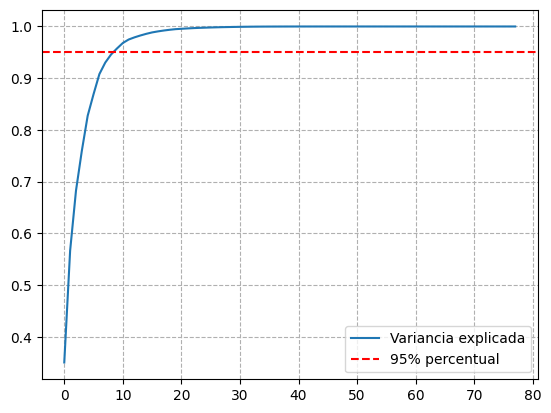

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_mul_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variancia explicada')
plt.axhline(0.95,color='red',linestyle='--',label='95% percentual')
plt.grid(True, linestyle='--')
plt.legend()
#print the features chosen by pca

plt.show()


In [86]:
print(pca.n_components_)

78


In [87]:
to_pca = [x_one_train, x_one_test, x_mul_train, x_mul_test, x_sur_test]
to_df = []
for df in to_pca:
    pca       = PCA(n_components=15)
    dados_pca = pca.fit_transform(df)
    to_df.append(pd.DataFrame(dados_pca))
    ## Examine loadings
    # loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components)], index=df.columns)
    # print("PCA Loadings:")
    # print(loadings)
    # # df.head()
    # sns.scatterplot(x=dados_pca[:,0],y=dados_pca[:,1],hue=Y)

to_df.append(y_one_train)
to_df.append(y_one_test)
to_df.append(y_mul_train)
to_df.append(y_mul_test)
to_df.append(y_sur_test)


In [88]:
print(to_df[0].head(0))

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Index: []


# Ajustar formatos

In [89]:
to_float32 = []
for df in to_df:
    to_float32.append(pd.DataFrame(df))


In [90]:
# Convert only float64 columns to float32
to_save = []
for df in to_float32:
    to_save.append(df.apply(lambda x: x.astype('float32') if x.dtype == 'float64' or x.dtype == 'int64' else x))


# Salvar bases de dados

In [91]:
## aqui não vale a pena dropar as linhas duplicadas, pois droparíamos as duplicadas no x e perderíamos a referência do y
# data = data.drop_duplicates()

In [92]:
name = ['x_one_train.csv','x_one_test.csv','x_mul_train.csv','x_mul_test.csv','x_sur_test.csv','y_one_train.csv','y_one_test.csv','y_mul_train.csv','y_mul_test.csv', 'y_sur_test.csv']
# name = ['x_one_train.csv','x_one_test.csv','x_mul_train.csv','x_mul_test.csv','y_one_train.csv','y_one_test.csv','y_mul_train.csv','y_mul_test.csv']
for df,i in zip(to_save,range(len(to_save))):
    df.to_csv(name[i], index=False)

In [93]:
to_save[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.392601,0.014371,0.193219,-0.203155,-0.078523,0.275205,0.070317,-0.005041,0.001383,-0.002608,-0.049564,-0.025859,0.109171,-0.045998,-0.022931
1,1.100729,-0.412886,0.067409,0.138642,-0.073719,-0.198267,-0.150747,-0.156005,0.051013,0.004332,-0.037650,0.077061,-0.026868,-0.074497,0.051436
2,-0.484523,-0.029647,0.016216,-0.077058,-0.089558,0.053043,0.017414,-0.116273,-0.042537,-0.113399,0.542855,0.128319,0.130025,-0.062849,0.065512
3,-0.508385,0.415925,0.826429,0.158295,0.746725,-0.541691,0.130277,0.080057,0.173722,0.126985,0.082739,-0.203395,0.020356,-0.003429,0.031033
4,-0.411864,-0.021242,0.183343,-0.182665,-0.095171,0.148519,0.093882,-0.077213,-0.029743,0.000114,0.038079,0.011514,-0.073768,0.083699,-0.023483
